# Data Visualisation Group Project

## Group Name: Oculart

## Project's directories
The produced visualisations from this notebook have been included into our final html presentantion in the following link:
> http://oculart.surge.sh/

The full directory can be found on glitch:
> https://glitch.com/~oculart or the presentantion at: https://oculart.glitch.me/

As well as in codepen project (in this case the static visualisation files are hosted on an external server due to codepen project limits):
> https://codepen.io/uceisko/project/editor/AxnyGQ

## Introduction
The data manipulation was done entirely with pandas.
For our project we have used three visualisation packages in Python: MatplotLib, Seaborn and Plotly (Plotly Express & Plotly Go depending the visualisation). 

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"  #show multiple outputs

import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt # graphing capabilities
import matplotlib.patches as patches #annotations inside plot

import seaborn as sns# for data viz.

import plotly.express as px #plotly express
import plotly.graph_objects as go #plotly go

#export to html
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


pd.set_option('display.max_columns', 300) #show all columns

import os  #get files' directories
for dirname, _, filenames in os.walk('./Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./Datasets/WDI/WDIData.csv
./Datasets/WDI/WDICountry.csv
./Datasets/2019/survey_schema.csv
./Datasets/2019/questions_only.csv
./Datasets/2019/multiple_choice_responses.csv
./Datasets/2019/other_text_responses.csv
./Datasets/2017/RespondentTypeREADME.txt
./Datasets/2017/freeformResponses.csv
./Datasets/2017/multipleChoiceResponses.csv
./Datasets/2017/schema.csv
./Datasets/2017/conversionRates.csv
./Datasets/2018/freeFormResponses.csv
./Datasets/2018/SurveySchema.csv
./Datasets/2018/multipleChoiceResponses.csv


Below we install the pycountry_convert package. It will allow us to get the continents of different country names

In [2]:
!pip install pycountry_convert #to get the continents of different countries

  Using cached pycountry_convert-0.7.2-py3-none-any.whl (13 kB)
  Using cached pytest_mock-3.1.1-py3-none-any.whl (10 kB)
Processing /home/faculty/.cache/pip/wheels/5e/d3/aa/d4d009d8d8489715d33932f44fc2582dfc216e0fde3a5016ee/pycountry-19.8.18-py2.py3-none-any.whl
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl (16 kB)
  Using cached repoze.lru-0.7-py3-none-any.whl (10 kB)
  Using cached pytest_cov-2.9.0-py2.py3-none-any.whl (19 kB)
  Using cached coverage-5.1-cp36-cp36m-manylinux1_x86_64.whl (227 kB)
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.


## Importing & Exploring the Dataset

The dataset that we have used for our visualisation is the Kaggle Survey 2019 : https://www.kaggle.com/c/kaggle-survey-2019
Firstly, we loaded the question dataframe which contains the 34 questions of the survey. By examining them, it was easier for us to find interesting angles.

In [3]:
questions = pd.read_csv('./Datasets/2019/questions_only.csv', low_memory=False).T #Transpose
questions

### Consult if you want the dataset with all the questions if you want ('multiple_T ' in the next code block)

,0
Time from Start to Finish (seconds),Duration (in seconds)
Q1,What is your age (# years)?
Q2,What is your gender? - Selected Choice
Q3,In which country do you currently reside?
Q4,What is the highest level of formal education ...
Q5,Select the title most similar to your current ...
Q6,What is the size of the company where you are ...
Q7,Approximately how many individuals are respons...
Q8,Does your current employer incorporate machine...
Q9,Select any activities that make up an importan...


It is worth mentioning that answers to some questions are split into subcolumns, resulting in 246 columns in total. Hence, we loaded in the subcolumns to see what are the choices for some questions.

In [4]:
subcolumns = pd.read_csv('./Datasets/2019/multiple_choice_responses.csv', low_memory=False)
subcolumns = subcolumns.iloc[[0]].T
subcolumns

,0
Time from Start to Finish (seconds),Duration (in seconds)
Q1,What is your age (# years)?
Q2,What is your gender? - Selected Choice
Q2_OTHER_TEXT,What is your gender? - Prefer to self-describe...
Q3,In which country do you currently reside?
...,...
Q34_Part_9,Which of the following relational database pro...
Q34_Part_10,Which of the following relational database pro...
Q34_Part_11,Which of the following relational database pro...
Q34_Part_12,Which of the following relational database pro...


## Creation of our key attribute for this analysis

We decided to use team size as a key attribute. Below we perform a quick calculation of the total observations per each key attribute value:

In [5]:
employed = pd.read_csv('./Datasets/2019/multiple_choice_responses.csv', low_memory=False)
employed.Q7.value_counts().to_frame()

,Q7
20+,3178
1-2,3005
3-4,2319
0,1880
5-9,1847
10-14,967
15-19,427
Approximately how many individuals are responsible for data science workloads at your place of business?,1


Note that the first column of the dataset contain the actual question names. Below we are going to remove them, as we have stored them in the "questions" object

In [6]:
employed = employed[1:]

In addition, as we have decided that we will deal only with responders who currently work in teams, we will remove all responders who do not have an answer in team size question of the survey:

In [7]:
employed.shape #initial dimensions of the dataset

(19717, 246)

In [8]:
employed = employed.dropna(subset=['Q7']) #we dropped all na values in the Q7 (team size) column.
employed.shape  #Now, there are 13623 respondents who belong to different team size

(13623, 246)

Below we get the number of responders who work in different size of teams

In [9]:
employed = employed.loc[employed.Q7!='0']   #we remove users who do not work in teams
#employed = employed.loc[employed.Q7!='1-2']
employed.Q7.value_counts()

20+      3178
1-2      3005
3-4      2319
5-9      1847
10-14     967
15-19     427
Name: Q7, dtype: int64

We divided respondents into two subgroups: small team (2-4) and large team (>4). It is worth mentioning that the size of the two groups is close, indicating that it will not lead to biasness.

In [10]:
employed['Q7B']= 'Small'
employed.loc[employed.Q7.isin([ '5-9', '10-14', '15-19', '20+']), 'Q7B'] = 'Large' 
employed.Q7B.value_counts().to_frame()

,Q7B
Large,6419
Small,5324


The following code desmonstrates final examinations on the dataset.

In [11]:
employed.shape

(11743, 247)

In [12]:
employed.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8', 'Q34_Part_9',
       'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12', 'Q34_OTHER_TEXT', 'Q7B'],
      dtype='object', length=247)

In [13]:
employed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11743 entries, 2 to 19717
Columns: 247 entries, Time from Start to Finish (seconds) to Q7B
dtypes: object(247)
memory usage: 22.2+ MB


# Data Transformation - Adjust labels

Here we performed data transformations on our dataset: 
1. we renamed coutry labels to be recognised from plotly ISO format
2. We recreated the categorization of salary.

In [14]:
#renaming country labels to be recognised from plotly ISO format
df_data = employed  #temporary assign to another variable
df_data["Q3"] = df_data["Q3"].str.replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom", regex=False)
df_data["Q3"] = df_data["Q3"].str.replace("United States of America","United States", regex=False)
df_data["Q3"] = df_data["Q3"].str.replace("Iran, Islamic Republic of...","Iran", regex=False)
df_data["Q3"] = df_data["Q3"].str.replace("Republic of Korea","South Korea", regex=False)
df_data["Q3"] = df_data["Q3"].str.replace("Viet Nam","Vietnam", regex=False)
df_data["Q3"] = df_data["Q3"].str.replace("Hong Kong (S.A.R.)","Hong Kong", regex=False)

In [15]:
df_salary = df_data#.dropna() #temporary assign to one more new variable
df_salary["SalaryTemp"] = df_salary["Q10"].str.replace("$0-999","0-999", regex=False)
df_salary["SalaryTemp"] = df_salary["SalaryTemp"].str.replace("> $500,000","500,000-499,999", regex=False)
df_salary["SalaryTemp"] = df_salary["SalaryTemp"].str.replace("300,000-500,000","300,000-499,999", regex=False)
df_salary["SalaryTemp"] = df_salary["SalaryTemp"].str.replace(",","", regex=False)
df_salary["SalaryLowLimit"] = df_salary["SalaryTemp"].str.split('-', expand=True)[0]
df_salary["SalaryLowLimit"] = pd.to_numeric(df_salary["SalaryLowLimit"], errors='coerce')
df_salary["SalaryUpLimit"] = df_salary["SalaryTemp"].str.split('-', expand=True)[1]
df_salary["SalaryUpLimit"] = pd.to_numeric(df_salary["SalaryUpLimit"], errors='coerce')+1
df_salary["SalaryMean"] = (df_salary["SalaryLowLimit"]+df_salary["SalaryUpLimit"])/2   #get mean salary from upper - lower limit
#we recognise the we do not get the actual salary of an employee but instead we have an mean estimation for it
#this is an assumption to have a continuous variable

In [16]:
df_salary.SalaryTemp.value_counts()

0-999            1122
10000-14999       707
100000-124999     690
40000-49999       630
30000-39999       626
50000-59999       608
60000-69999       515
1000-1999         505
70000-79999       478
125000-149999     460
5000-7499         458
15000-19999       451
20000-24999       447
150000-199999     414
25000-29999       414
80000-89999       382
7500-9999         358
90000-99999       340
2000-2999         320
3000-3999         256
4000-4999         238
200000-249999     162
500000-499999      77
300000-499999      73
250000-299999      64
Name: SalaryTemp, dtype: int64

In [17]:
#final values
df_salary.SalaryMean.value_counts()

500.0       1122
12500.0      707
112500.0     690
45000.0      630
35000.0      626
55000.0      608
65000.0      515
1500.0       505
75000.0      478
137500.0     460
6250.0       458
17500.0      451
22500.0      447
175000.0     414
27500.0      414
85000.0      382
8750.0       358
95000.0      340
2500.0       320
3500.0       256
4500.0       238
225000.0     162
500000.0      77
400000.0      73
275000.0      64
Name: SalaryMean, dtype: int64

The same concept is also applied on cloud expenditure from the company of the responder

In [18]:
df_salary["CloudExp"] = df_salary["Q11"].str.replace("$0 (USD)","0", regex=False)
df_salary["CloudExp"] = df_salary["CloudExp"].str.replace("$1-$99","1-99", regex=False)
df_salary["CloudExp"] = df_salary["CloudExp"].str.replace("$100-$999","100-999", regex=False)
df_salary["CloudExp"] = df_salary["CloudExp"].str.replace("$1000-$9,999","1,000-9,999", regex=False)
df_salary["CloudExp"] = df_salary["CloudExp"].str.replace("$10,000-$99,9999","1,0000-99,999", regex=False)
df_salary["CloudExp"] = df_salary["CloudExp"].str.replace("> $100,000 ($USD)","99,999-100,000", regex=False)
df_salary["CloudExp"] = df_salary["CloudExp"].str.replace("$1000-$9,999","1,000-9,999", regex=False)
df_salary["CloudExp"] = df_salary["CloudExp"].str.replace(",","", regex=False)
df_salary["CloudExpLowLimit"] = df_salary["CloudExp"].str.split('-', expand=True)[0]
df_salary["CloudExpLowLimit"] = pd.to_numeric(df_salary["CloudExpLowLimit"], errors='coerce')
df_salary["CloudExpUpLimit"] = df_salary["CloudExp"].str.split('-', expand=True)[1]
df_salary["CloudExpUpLimit"] = pd.to_numeric(df_salary["CloudExpUpLimit"], errors='coerce')
df_salary["CloudExpMean"] = round((df_salary["CloudExpLowLimit"]+df_salary["CloudExpUpLimit"])/2)

In [19]:
employed = df_salary #back to our initial variable
employed.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q7B,SalaryTemp,SalaryLowLimit,SalaryUpLimit,SalaryMean,CloudExp,CloudExpLowLimit,CloudExpUpLimit,CloudExpMean
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Cloud-based data software & APIs (AWS, GCP, Az...",-1,-1,-1,-1,0,-1,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,

# Define Matplotlib Style

For our project we would like to have consistent and coherent styles for visualisation. Helow we define a style in matplotlib which will be used across all of our static visualisations.

In [20]:
from matplotlib import rcParams
import matplotlib.pylab as pylab
import matplotlib.style as style
from cycler import cycler #color palette

plt.rcParams.update(plt.rcParamsDefault) #reset any style that have been used before
%matplotlib inline

plt.style.use('Solarize_Light2') #In the beginning we load a preset style, in the next lines we modify it


#rcParams.keys()  #all available params can be found here

import matplotlib.pylab as pylab
params = {
    'font.family': 'serif',
    'font.sans-serif':'Adobe Caslon Pro',
    'legend.fontsize': 'x-large',
    'figure.figsize': (8, 8),
    'figure.dpi': 300,              #for high quality printing
     'axes.prop_cycle': cycler(color=[u'#0081A1', u'#19D1FF', u'#00BEED', u'#A14D00', u'#ED7200']), #color palette that we created from adobe colour wheel: https://color.adobe.com/create/color-wheel
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
          'xtick.color': 'black',
        'ytick.color': 'black',
    'axes.labelcolor':'black',
           'xtick.minor.size': 0.0
         }

pylab.rcParams.update(params) #assign our new style to matplotlib. Seaborn will use the same, as it is based in matplotlib

# Development of Visualisations
## 1. Stacked Barchart - Educational background

The Question 4 has the following possible answers regarding the educational level of the responders:

In [21]:
employed.Q4.value_counts()

Master’s degree                                                      5586
Bachelor’s degree                                                    3039
Doctoral degree                                                      2073
Professional degree                                                   432
Some college/university study without earning a bachelor’s degree     350
I prefer not to answer                                                160
No formal education past high school                                  103
Name: Q4, dtype: int64

We devided respondents into four main categories: no academic degree, Bachelor degree ,Master degree, Doctoral degree.

In [22]:
employed['Q4B'] = 'No academic education'
employed.loc[employed.Q4.isin(['Master’s degree']), 'Q4B'] = 'Master degree' 
employed.loc[employed.Q4.isin(['Doctoral degree']), 'Q4B'] = 'Doctoral degree' 
employed.loc[employed.Q4.isin(['Bachelor’s degree']), 'Q4B'] = 'Bachelor degree' 
employed_temp = employed.loc[employed.Q4!='I prefer not to answer']
results = employed_temp.groupby(['Q7B', 'Q4B'])['Q4B'].count().to_frame()
results

Q4B
Q7B   Q4B                        
Large Bachelor degree        1620
      Doctoral degree        1234
      Master degree          3069
      No academic education   420
Small Bachelor degree        1419
      Doctoral degree         839
      Master degree          2517
      No academic education   465

We translated the total observations to a fraction out of all responders of the same team size ('Large', 'Small'). 

In [23]:
results  = results.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack(1)

In addition we performed some pre-processing before producing our visualisation.

In [24]:
results.columns=results.columns.get_level_values(1)
results_df = results
results_df = results_df.iloc[:, [3,0,2,1]] #rearrange columns/rows
results_df = results_df.iloc[[1,0],:]
results_df = results_df.round(0).astype(int)
results_df

Q4B,No academic education,Bachelor degree,Master degree,Doctoral degree
Q7B,,,,
Small,9,27,48,16
Large,7,26,48,19


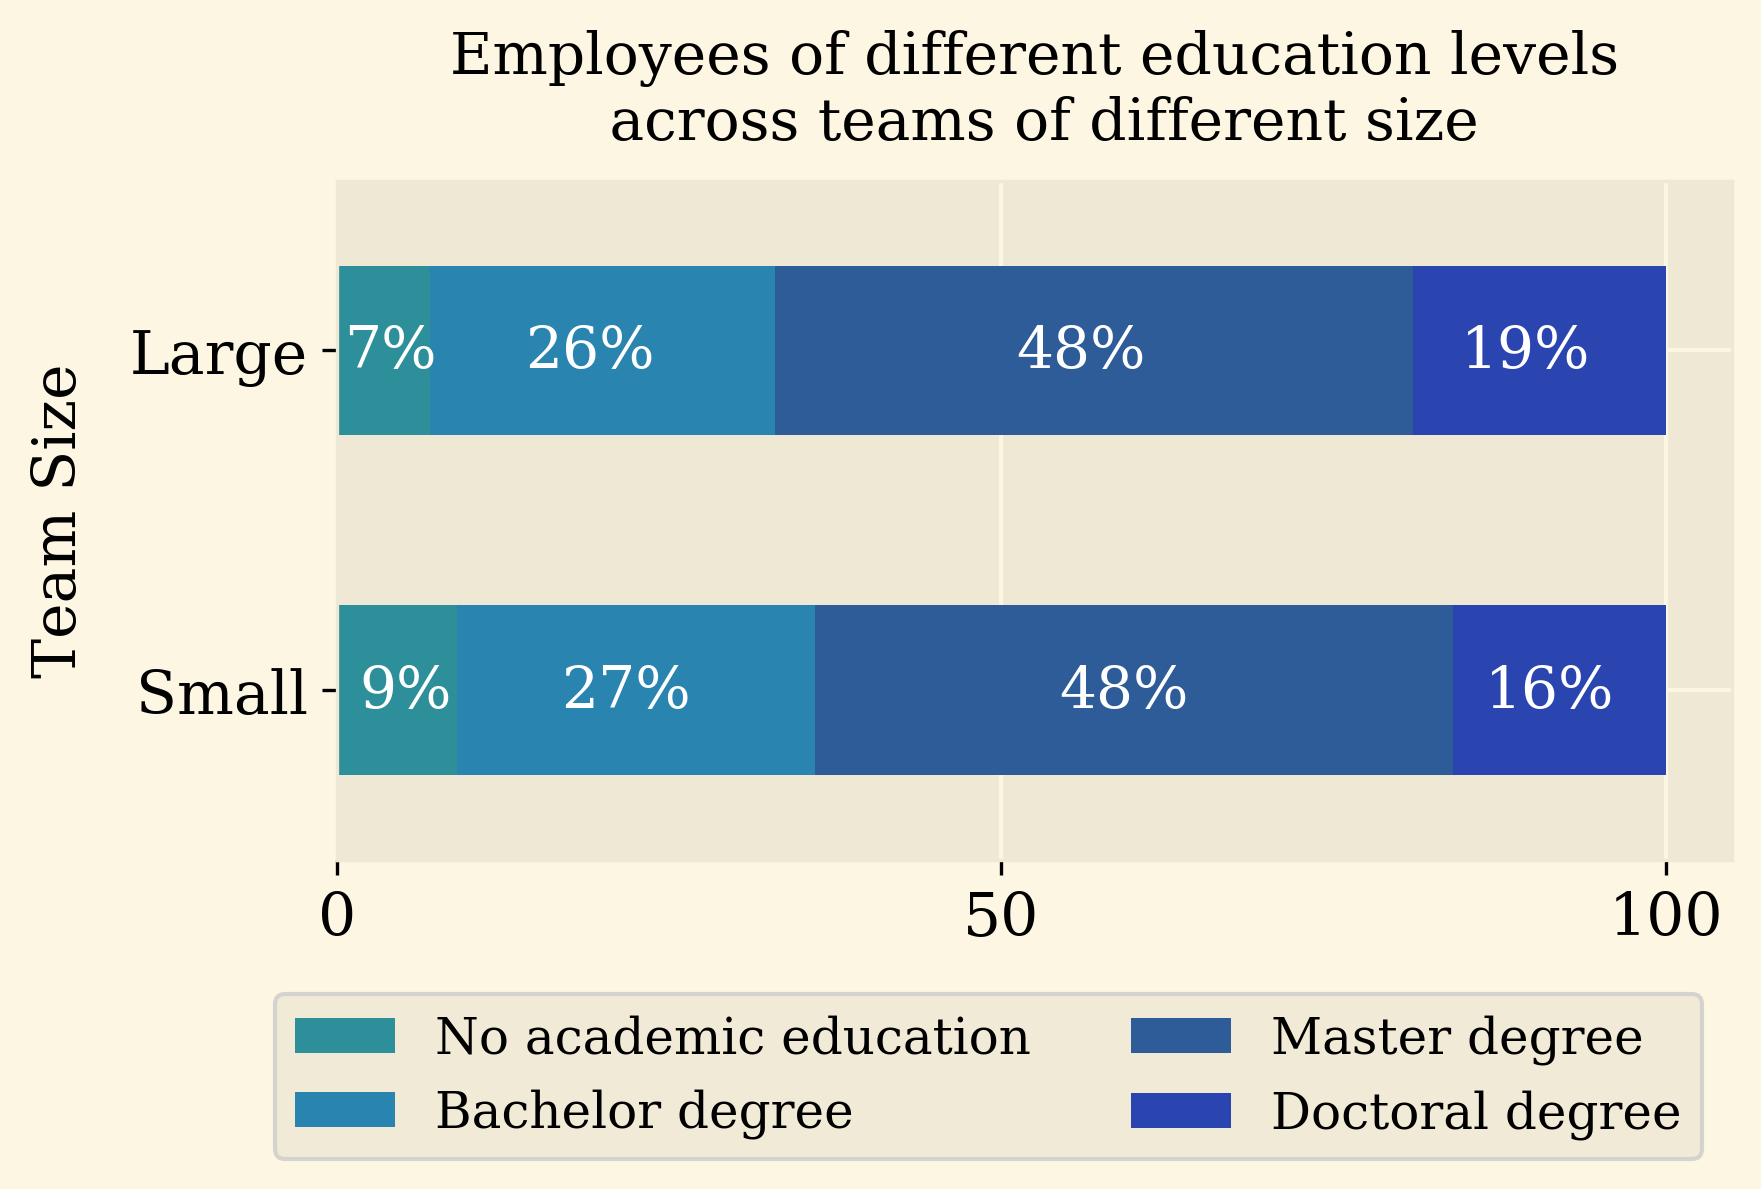

In [25]:
#visualisation produced with visualisation functionalities of pandas (based on matplotlib)
rcParams['figure.figsize'] = 6, 3 #size based on font size of in bar text; make the y'y axis as long as to make easy readable the 6.62% on second bar

ax = results_df.plot(kind='barh', stacked=True, color=['#2C8F99','#2A84B0','#2D5C99', '#2A44B0']) #direct call to the dataframe object to product the plot

#Create in bar labels; ref: #ref:https://stackoverflow.com/a/54163536
#adjusted to be as much as possible in the mid of every block

#For Large Bar
xpos = -6.62+1
prevxpos=0
for val in results_df.iloc[0]:
    xpos += val
    ax.text(prevxpos+(xpos-prevxpos)/2 , -0.05, str(val)+"%", color='white', size=14) #get approximately the mid position
    prevxpos = xpos
xpos = 0

#For Small Bar
xpos = -8.87+3 
prevxpos=0
for val in results_df.iloc[1]: 
    xpos += val
    ax.text(prevxpos+(xpos-prevxpos)/2, 0.95, str(val)+"%", color='white', size=14) #get approximately the mid position
    prevxpos = xpos
xpos = 0

    
plt.legend(bbox_to_anchor=(1.05,-0.05), ncol=2, borderaxespad=2, fontsize='large') #adjust place/size of legend

plt.title('Employees of different education levels\n across teams of different size',size= 14, pad=10, loc='center') #add title

plt.setp(plt.gca().get_xticklabels(), rotation=0, horizontalalignment='right') #get xticks
plt.xticks([0,50,100], ha='center') #select xtick labels

ax.set_ylabel("Team Size", labelpad=10); #y-axis label

## 2. Dot plot - gender pay gap per different size of team


The second graph shows the gender pay gap across the two groups. In both team size groups, female tend to have less salary than male; however, this situation get worse for respndents in large groups. 

It is clear that the gender pay gap is much large in large teams, indicating that gender inequality might be more widespread in large teams.

Below we get the median salary for every combination of team size/gender

In [26]:
gender_salary = employed.groupby(['Q7B', 'Q2']).agg({'SalaryMean':'median'}) #groupby
gender_salary 

SalaryMean
Q7B   Q2                                 
Large Female                      27500.0
      Male                        45000.0
      Prefer not to say           50000.0
      Prefer to self-describe     75000.0
Small Female                      12500.0
      Male                        22500.0
      Prefer not to say           31250.0
      Prefer to self-describe     65000.0

In [27]:
gender_salary = gender_salary.iloc[[0,1,4,5]] #some pre-processing (prefer not to say / prefer to self-describe were excluded)
gender_salary = gender_salary.unstack(-1).reset_index()
gender_salary.columns = ['Q7B', 'Female', 'Male']
gender_salary = gender_salary.iloc[[1,0]]
gender_salary 

,Q7B,Female,Male
1,Small,12500.0,22500.0
0,Large,27500.0,45000.0


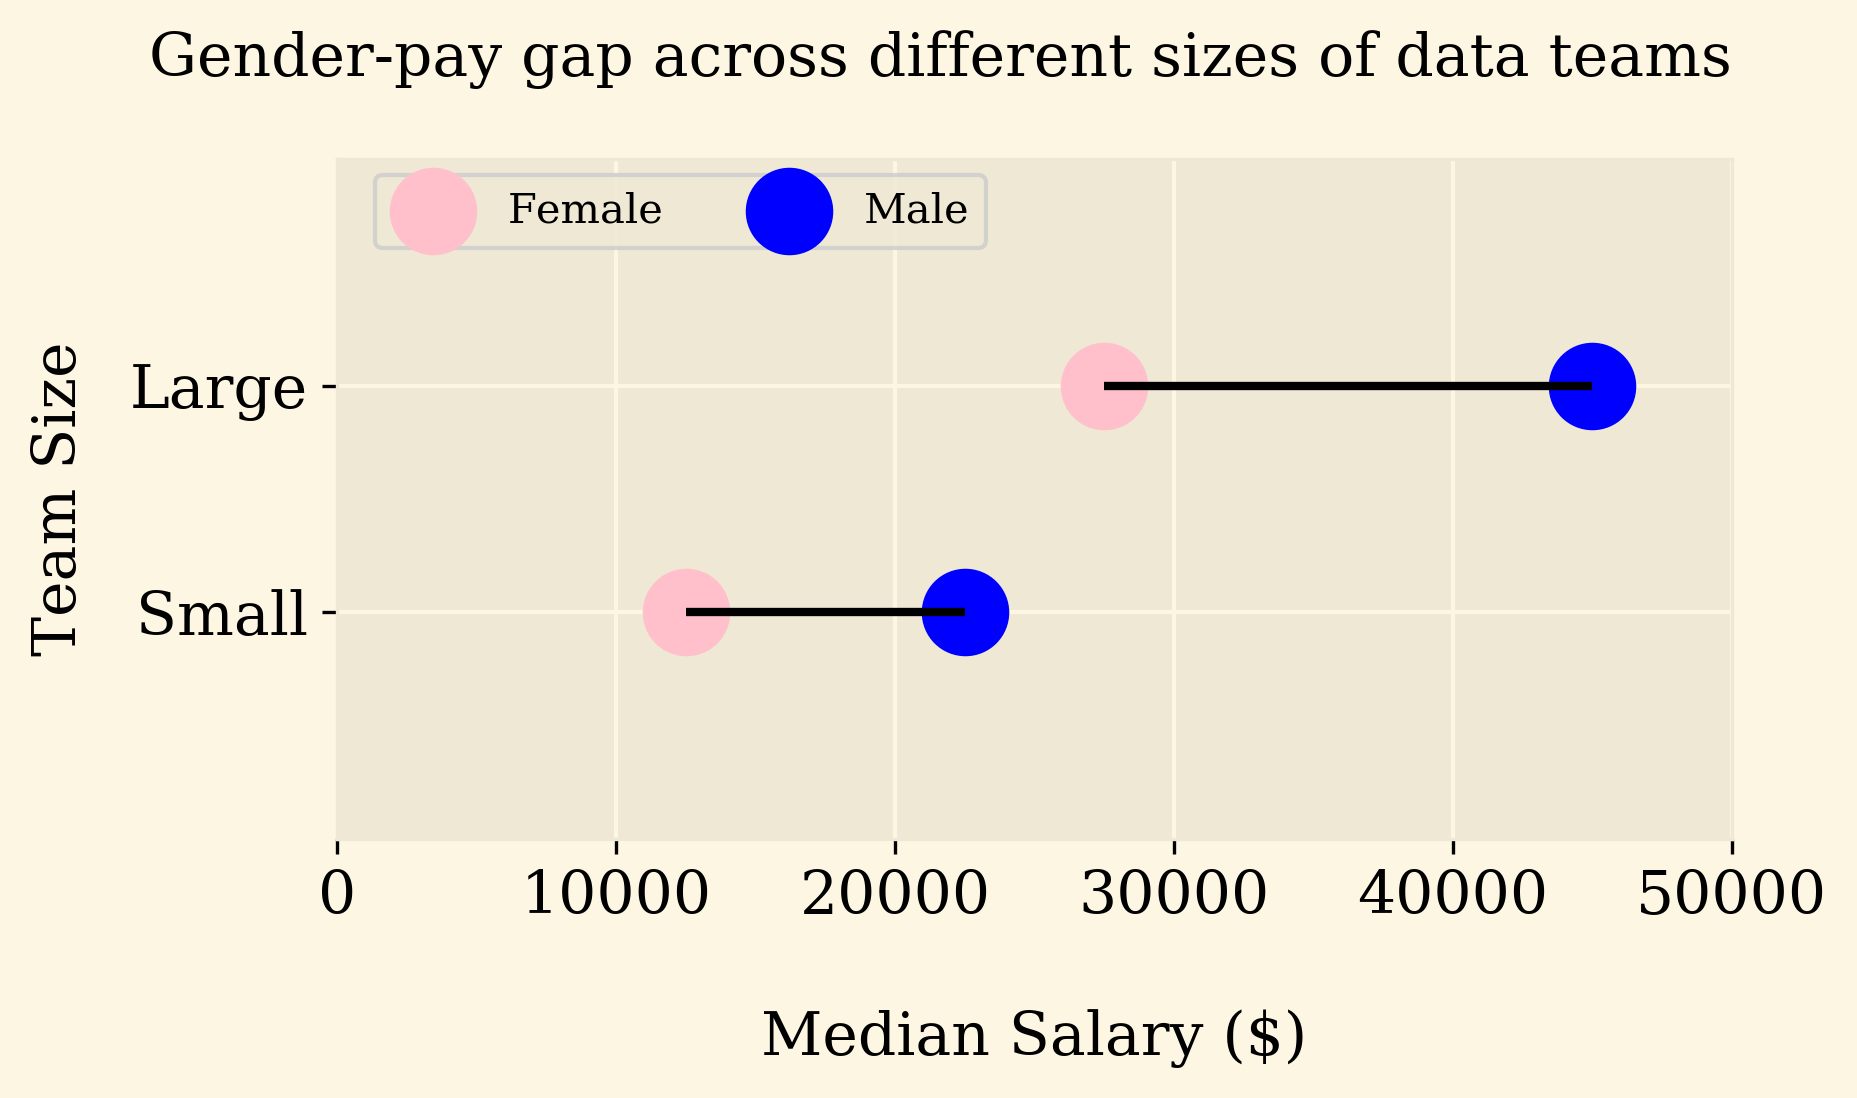

In [28]:
#produced in pure matplotlib
rcParams['figure.figsize'] = 6, 3

# Reorder it following the values of the first value:
ordered_df = gender_salary
my_range=range(1,len(gender_salary.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
 
plt.hlines(y=my_range, xmin=ordered_df['Female'], xmax=ordered_df['Male'], color='k', alpha=1)
plt.scatter(ordered_df['Female'], my_range, color='pink', alpha=1, label='Female', s=400)
plt.scatter(ordered_df['Male'], my_range, color='blue', alpha=1 , label='Male', s=400)
 
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Q7B'])
plt.title("Gender-pay gap across different sizes of data teams", loc='right', pad=20)
plt.xlabel('Median Salary ($)', labelpad=20)
plt.ylabel('Team Size', labelpad=10)
plt.legend(bbox_to_anchor=(0.525,1.1), ncol=2, borderaxespad=2, fontsize='medium')

plt.ylim(0,3)
plt.xlim(0,50000);

## 3. Multiple Line Graph - Median salary per different years of Machine Learning experience per different team size

The following plot aims to explore the impact of working experience in machine learning on salary acorss different team size.In general, the median salary increases as years of working experience in machine learning increase in both groups. However, the median salary in large teams outperforms that in small teams (i.e. around $10k pay gap). 

It is worth noticing that the salary gap between the two groups reached its peak point ($27500) when respondents have more than 20 years of working experience in machine learning.

First we get the median salary per different years of experience and different size of team:

In [29]:
years_exp = employed.groupby(['Q7B', 'Q23']).agg({'SalaryMean':'median'})
years_exp

SalaryMean
Q7B   Q23                    
Large 1-2 years       27500.0
      10-15 years    112500.0
      2-3 years       45000.0
      20+ years      112500.0
      3-4 years       55000.0
      4-5 years       65000.0
      5-10 years      95000.0
      < 1 years       17500.0
Small 1-2 years       17500.0
      10-15 years     65000.0
      2-3 years       35000.0
      20+ years       85000.0
      3-4 years       45000.0
      4-5 years       55000.0
      5-10 years      75000.0
      < 1 years        8750.0

In [30]:
years_exp = years_exp.reset_index()  #some preprocessing
years_exp.columns = ['Team Size', 'Years of Working Experience in Machine Learning', 'Median Salary']
years_exp = years_exp.iloc[[7,15,0,8,2,10,4,12,5,13,6,14,3,11]]
years_exp = years_exp.replace('I have never written code', 'No previous\n experience')
years_exp = years_exp.reset_index(drop=True)
years_exp

,Team Size,Years of Working Experience in Machine Learning,Median Salary
0,Large,< 1 years,17500.0
1,Small,< 1 years,8750.0
2,Large,1-2 years,27500.0
3,Small,1-2 years,17500.0
4,Large,2-3 years,45000.0
5,Small,2-3 years,35000.0
6,Large,3-4 years,55000.0
7,Small,3-4 years,45000.0
8,Large,4-5 years,65000.0
9,Small,4-5 years,55000.0


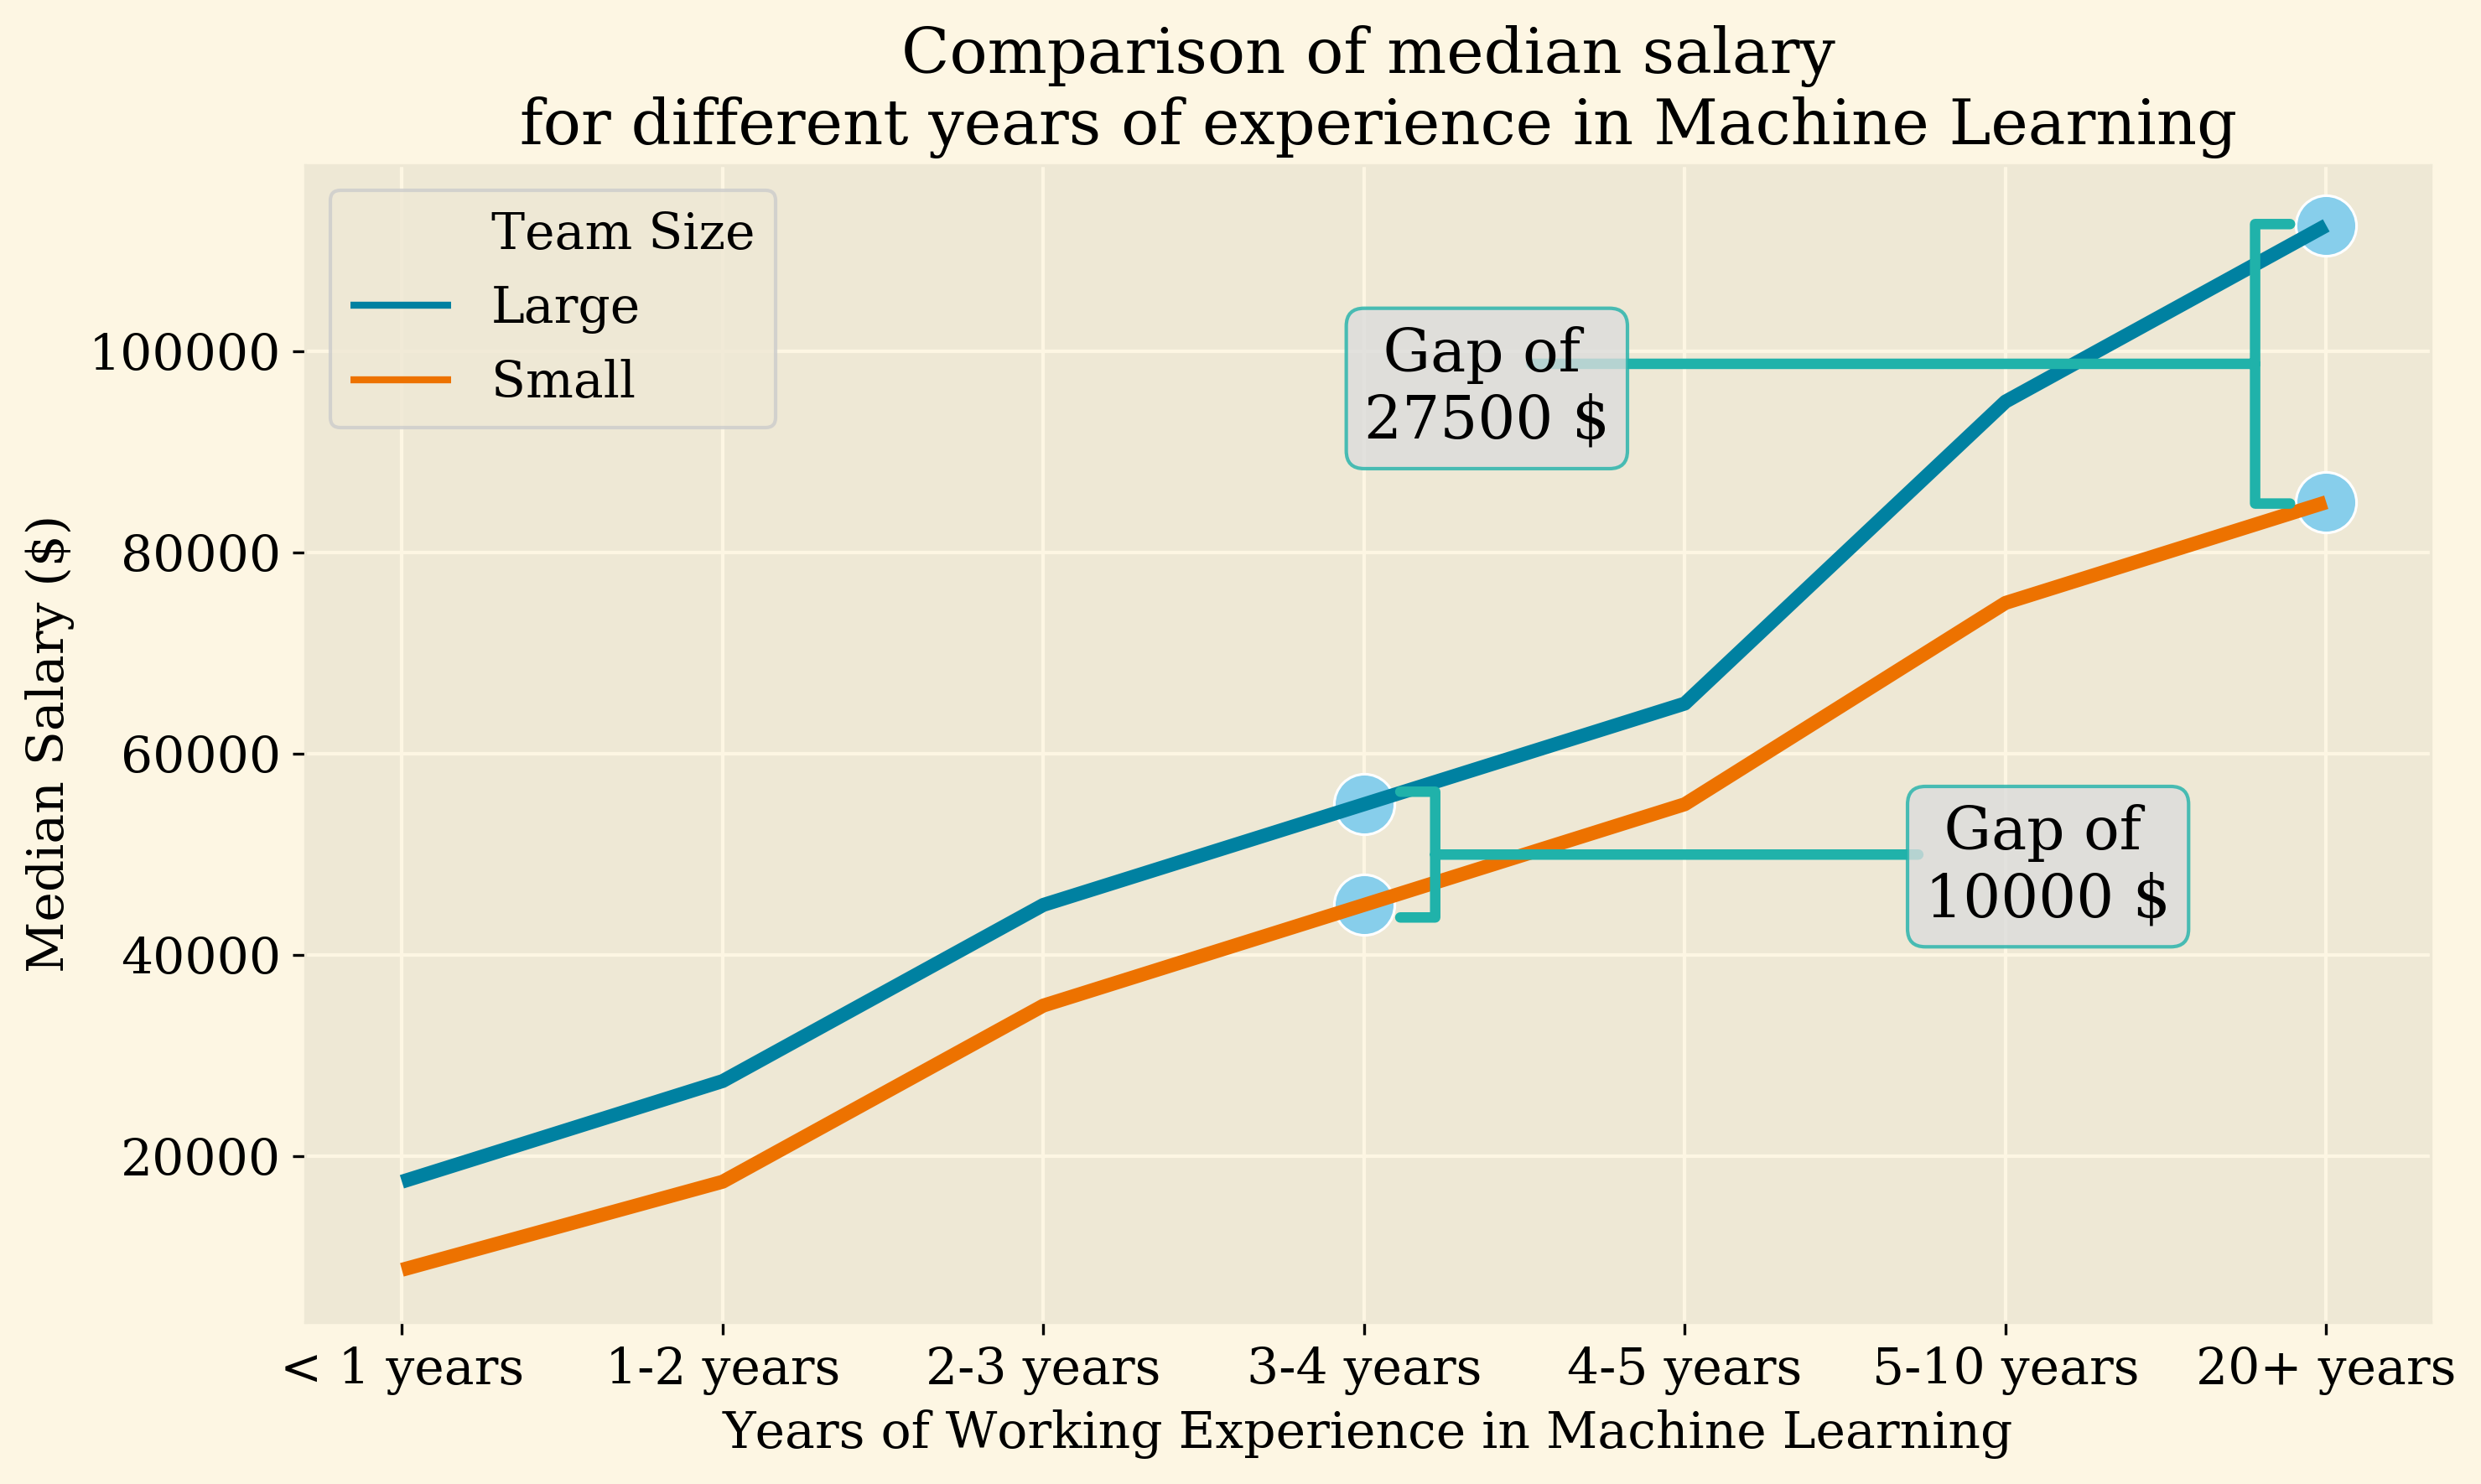

In [31]:
#written in seaborn - first a line plot then a scatterplot in top of it to annotate easily the points of our desire
plt.figure(num=None, figsize=(10, 6)) 

#sns.set(rc={'figure.figsize':(12,8)})
years_exp_sub = years_exp.iloc[[6,7,12,13]] #subset for making the scatter plot
#sns.set(style="whitegrid")
 

pay_gap= sns.lineplot(x="Years of Working Experience in Machine Learning", y="Median Salary",
             hue="Team Size",sort=False, lw=4, 
             data=years_exp, palette=['#0081A1',"#ED7200"]).set_title('Comparison of median salary\n for different years of experience in Machine Learning',size = 18)


pay_gap = sns.scatterplot(data=years_exp_sub, x="Years of Working Experience in Machine Learning", y="Median Salary",
                marker="o", color="skyblue", s=300) #creates only the blue dots in the graph, the additional annotations are created below

pay_gap.set( ylabel='Median Salary ($)') #set ylabel


###Annotation 1
#To calculate the position of the FancyArrow we had to: get the distance between 4+ salary and 2-4 salary of 20+years experience
#Then for this difference, we divided it by two, and we addeded on the lowest observation
#In this case the y position will equal to = ((112500-85000)/2)+85000=98750

style="-[ , widthB=40, lengthB=10"
arrow = patches.FancyArrowPatch((3.5,98750), (5.8,98750), arrowstyle=style, color="lightseagreen", linewidth=3)
plt.gca().add_patch(arrow).set_zorder(3) #set.zorder() bring the arrow in top of the figure, value refers to the layer

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='gainsboro', alpha=0.8, edgecolor='lightseagreen')

# place a text box in upper left in axes coords
plt.text(3, 102500, " Gap of \n27500 $", fontsize=17,
        verticalalignment='top', bbox=props).set_zorder(4)


###Annotation 2
#To calculate the position of the FancyArrow we had to: get the distance between 4+ salary and 2-4 salary of 20+years experience
#Then for this difference, we divided it by two, and we addeded on the lowest observation
#In this case the y position will equal to = (55000-45000)/2)+45000=50000

style="-[ , widthB=18, lengthB=10"
arrow = patches.FancyArrowPatch((4.75,50000), (3.2,50000), arrowstyle=style, color="lightseagreen", linewidth=3)
plt.gca().add_patch(arrow).set_zorder(3) #set.zorder() bring the arrow in top of the figure, value refers to the layer

props = dict(boxstyle='round', facecolor='gainsboro', alpha=0.8, edgecolor='lightseagreen')

# place a text box in upper left in axes coords
plt.text(4.75, 55000, " Gap of \n10000 $", fontsize=17,
        verticalalignment='top', bbox=props).set_zorder(6)


#ax.text(0.85, 0.85,'Text Here', fontsize=9)
#plt.legend(loc=2, prop={'size': 12})
plt.tight_layout()


plt.show();

## 4. Heatmap - Size of data team per different company sizes

The heatmap bellow explores the distribution of teams in different size of companies. It is interesting to see that small teams appear most frequently in small companies (i.e. 0-49 employees). In comparision, large teams appear the most in large compnaies (i.e. >10000 employees).

In the same fashion as in the previous visualisations we get the total number of responders for different size of data teams and diffferent size of companies

In [32]:
sizecomp = employed.groupby(['Q7B', 'Q6']).agg({'Q6':'count'}).unstack(-1).reset_index()
sizecomp

Q7B             Q6                                         \
Q6        0-49 employees 1000-9,999 employees 250-999 employees   
0   Large            594                 1722               909   
1   Small           2440                  631               664   

                                        
Q6 50-249 employees > 10,000 employees  
0               873               2321  
1              1085                504

In [33]:
heatmap1_data = pd.pivot_table(sizecomp, values='Q6',   #some additional pre-processing
                     columns='Q7B') #pivot table

heatmap1_data = heatmap1_data.T #transpose
heatmap1_data.columns = ['0-49\n employees', '1000-9,999\n employees', '250-999\n employees',
       '50-249\n employees', '> 10,000\n employees']

heatmap1_data = heatmap1_data.loc[:,['0-49\n employees','50-249\n employees','250-999\n employees'
                                   , '1000-9,999\n employees','> 10,000\n employees' ]]

heatmap1_data

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,0-49\n employees,50-249\n employees,250-999\n employees,"1000-9,999\n employees","> 10,000\n employees"
Q7B,,,,,
Large,594,873,909,1722,2321
Small,2440,1085,664,631,504


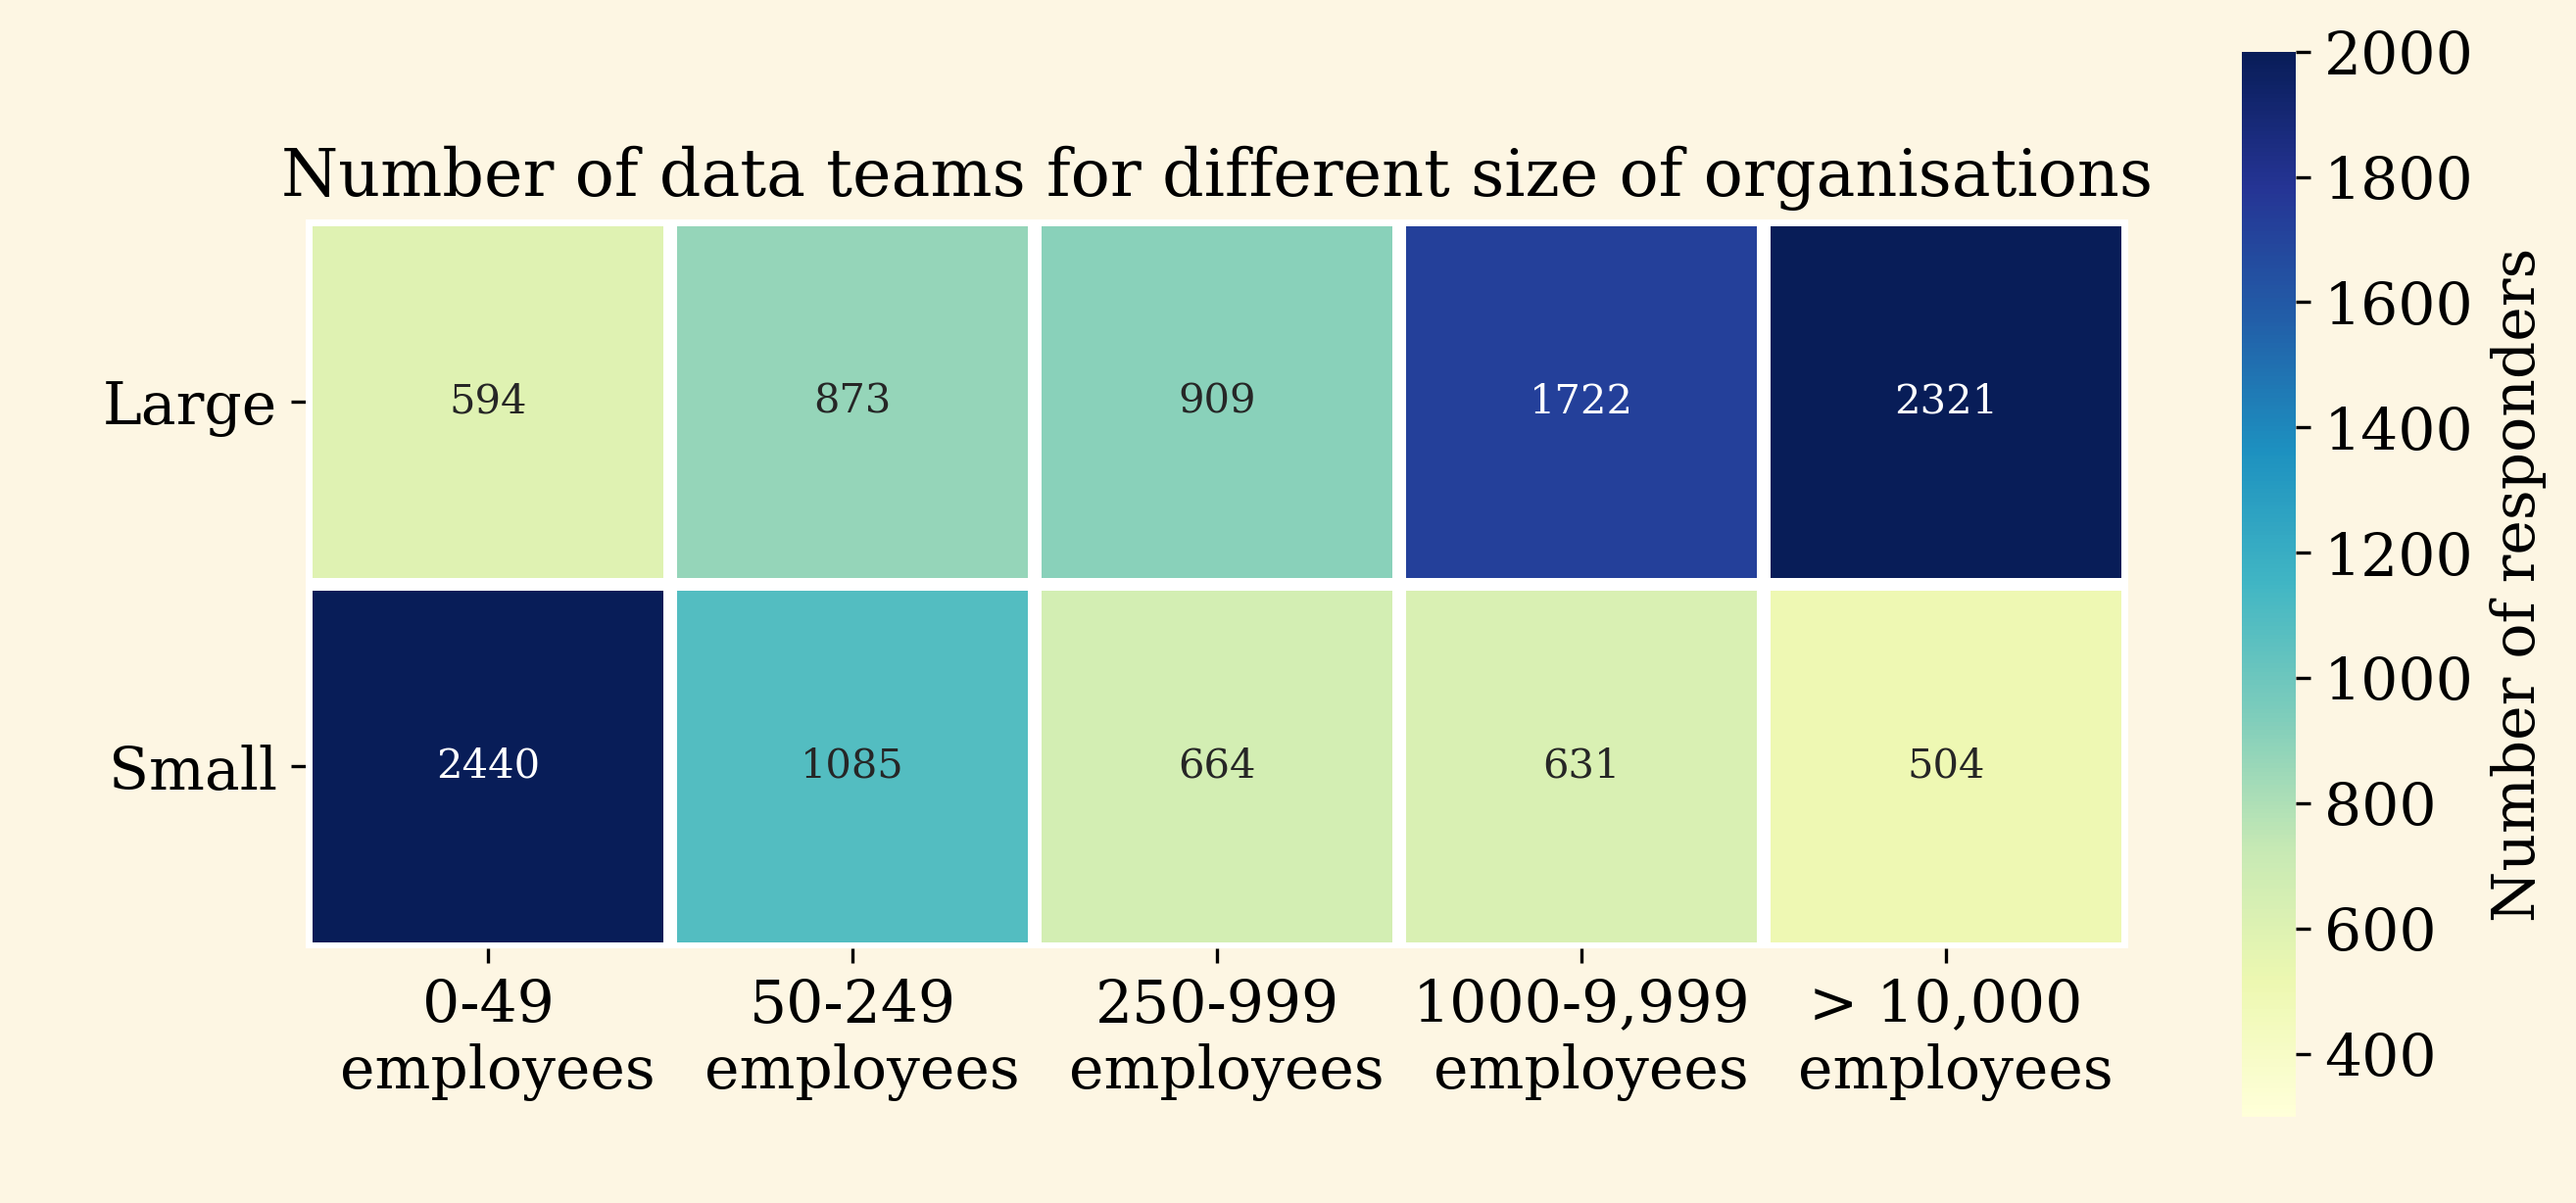

In [34]:
#created with seaborn's heatmap method
plt.figure(figsize=(10, 8))

a = sns.heatmap(heatmap1_data, cmap="YlGnBu", annot=True, fmt='g',linewidths=3,vmax=2000, vmin=300,square = True,cbar_kws={'label': 'Number of responders',"shrink": 0.6})#,cbar_kws={})
#sns.set(font_scale=1.4)
#plt.xticks(rotation=40)
plt.yticks(rotation=0)  #rotation of yticks to be horizontal

a.set_title('Number of data teams for different size of organisations', size = 16)
a.set_xlabel(' ')
a.set_ylabel(' ');

## 5. Barplot with hue - Preference in data visualisation tools per different size of team

The following horizontal barplot explores employees' preferences of visualisation tools in different group size. It is clear that both groups have almost the same preference of visualisation tools. 

And among all potential  visualisation tools, Matplotlib, Seaborn and ggplot2 are top 3 visualisation tools used by data scientists.

This question was actually a multiple choice. We had to extract all the columns from the dataset and give labels to them:

In [35]:
viz_tool = employed.loc[:,['Q7B','Q20_Part_1',
 'Q20_Part_2',
 'Q20_Part_3',
 'Q20_Part_4',
 'Q20_Part_5',
 'Q20_Part_6',
 'Q20_Part_7',
 'Q20_Part_8',
 'Q20_Part_9',
 'Q20_Part_10',
 'Q20_Part_11',
 'Q20_Part_12',]]#select all answers


#viz_tool['Q20_Part_1'].unique()[1] #for getting the column labels [1,2,....,12]

viz_tool_columns = ['Q7B', 'Ggplot / ggplot2', 'Matplotlib', 'Altair', 'Shiny', 'D3.js', 
                    'Plotly / Plotly Express', 'Bokeh', 'Seaborn', 'Geoplotlib',  'Leaflet / Folium',
                   'None', 'Other' ]

viz_tool.columns = viz_tool_columns 

viz_tool.head()

,Q7B,Ggplot / ggplot2,Matplotlib,Altair,Shiny,D3.js,Plotly / Plotly Express,Bokeh,Seaborn,Geoplotlib,Leaflet / Folium,None,Other
2,Large,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Large,Ggplot / ggplot2,Matplotlib,NaN,NaN,NaN,NaN,NaN,Seaborn,NaN,NaN,NaN,NaN
6,Small,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Large,NaN,Matplotlib,NaN,NaN,NaN,Plotly / Plotly Express,Bokeh,Seaborn,NaN,NaN,NaN,NaN
8,Large,NaN,Matplotlib,NaN,NaN,NaN,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN


Then we performed a simple aggregation over large and small teams

In [36]:
viz_tool = viz_tool.groupby('Q7B').count()
viz_tool.rename_axis('index', axis=1,inplace = True)
viz_tool

index,Ggplot / ggplot2,Matplotlib,Altair,Shiny,D3.js,Plotly / Plotly Express,Bokeh,Seaborn,Geoplotlib,Leaflet / Folium,None,Other
Q7B,,,,,,,,,,,,
Large,1690,3601,84,595,416,1316,463,2454,219,221,437,187
Small,1296,2987,50,454,453,1053,358,1979,221,221,362,163


In [37]:
viz_tool = viz_tool.sort_values(viz_tool.last_valid_index(), axis=1,ascending = False) #sort values from higher to lower
viz_tool

index,Matplotlib,Seaborn,Ggplot / ggplot2,Plotly / Plotly Express,Shiny,D3.js,None,Bokeh,Geoplotlib,Leaflet / Folium,Other,Altair
Q7B,,,,,,,,,,,,
Large,3601,2454,1690,1316,595,416,437,463,219,221,187,84
Small,2987,1979,1296,1053,454,453,362,358,221,221,163,50


In [38]:
viz_tool.loc["Large"] = viz_tool.loc["Large"] /6419 #get the percentage rather than absolute number
viz_tool.loc["Small"] = viz_tool.loc["Small"] / 5324

In [39]:
df_melted_2 = viz_tool.reset_index().melt(id_vars='Q7B') #final pre-processing
df_melted_2.rename(columns={'Q7B': 'Team Size',"variable": "Tools","value":"Percentage","index":"Visualisation tools"}, inplace=True)
indexNames2 = df_melted_2[ df_melted_2['Visualisation tools'] == "None" ].index
df_melted_2.drop(indexNames2 , inplace=True)#reove those who did not use any viz tools
df_melted_2

,Team Size,Visualisation tools,Percentage
0,Large,Matplotlib,0.560991
1,Small,Matplotlib,0.561044
2,Large,Seaborn,0.382303
3,Small,Seaborn,0.371713
4,Large,Ggplot / ggplot2,0.263281
5,Small,Ggplot / ggplot2,0.243426
6,Large,Plotly / Plotly Express,0.205016
7,Small,Plotly / Plotly Express,0.197784
8,Large,Shiny,0.092694
9,Small,Shiny,0.085274


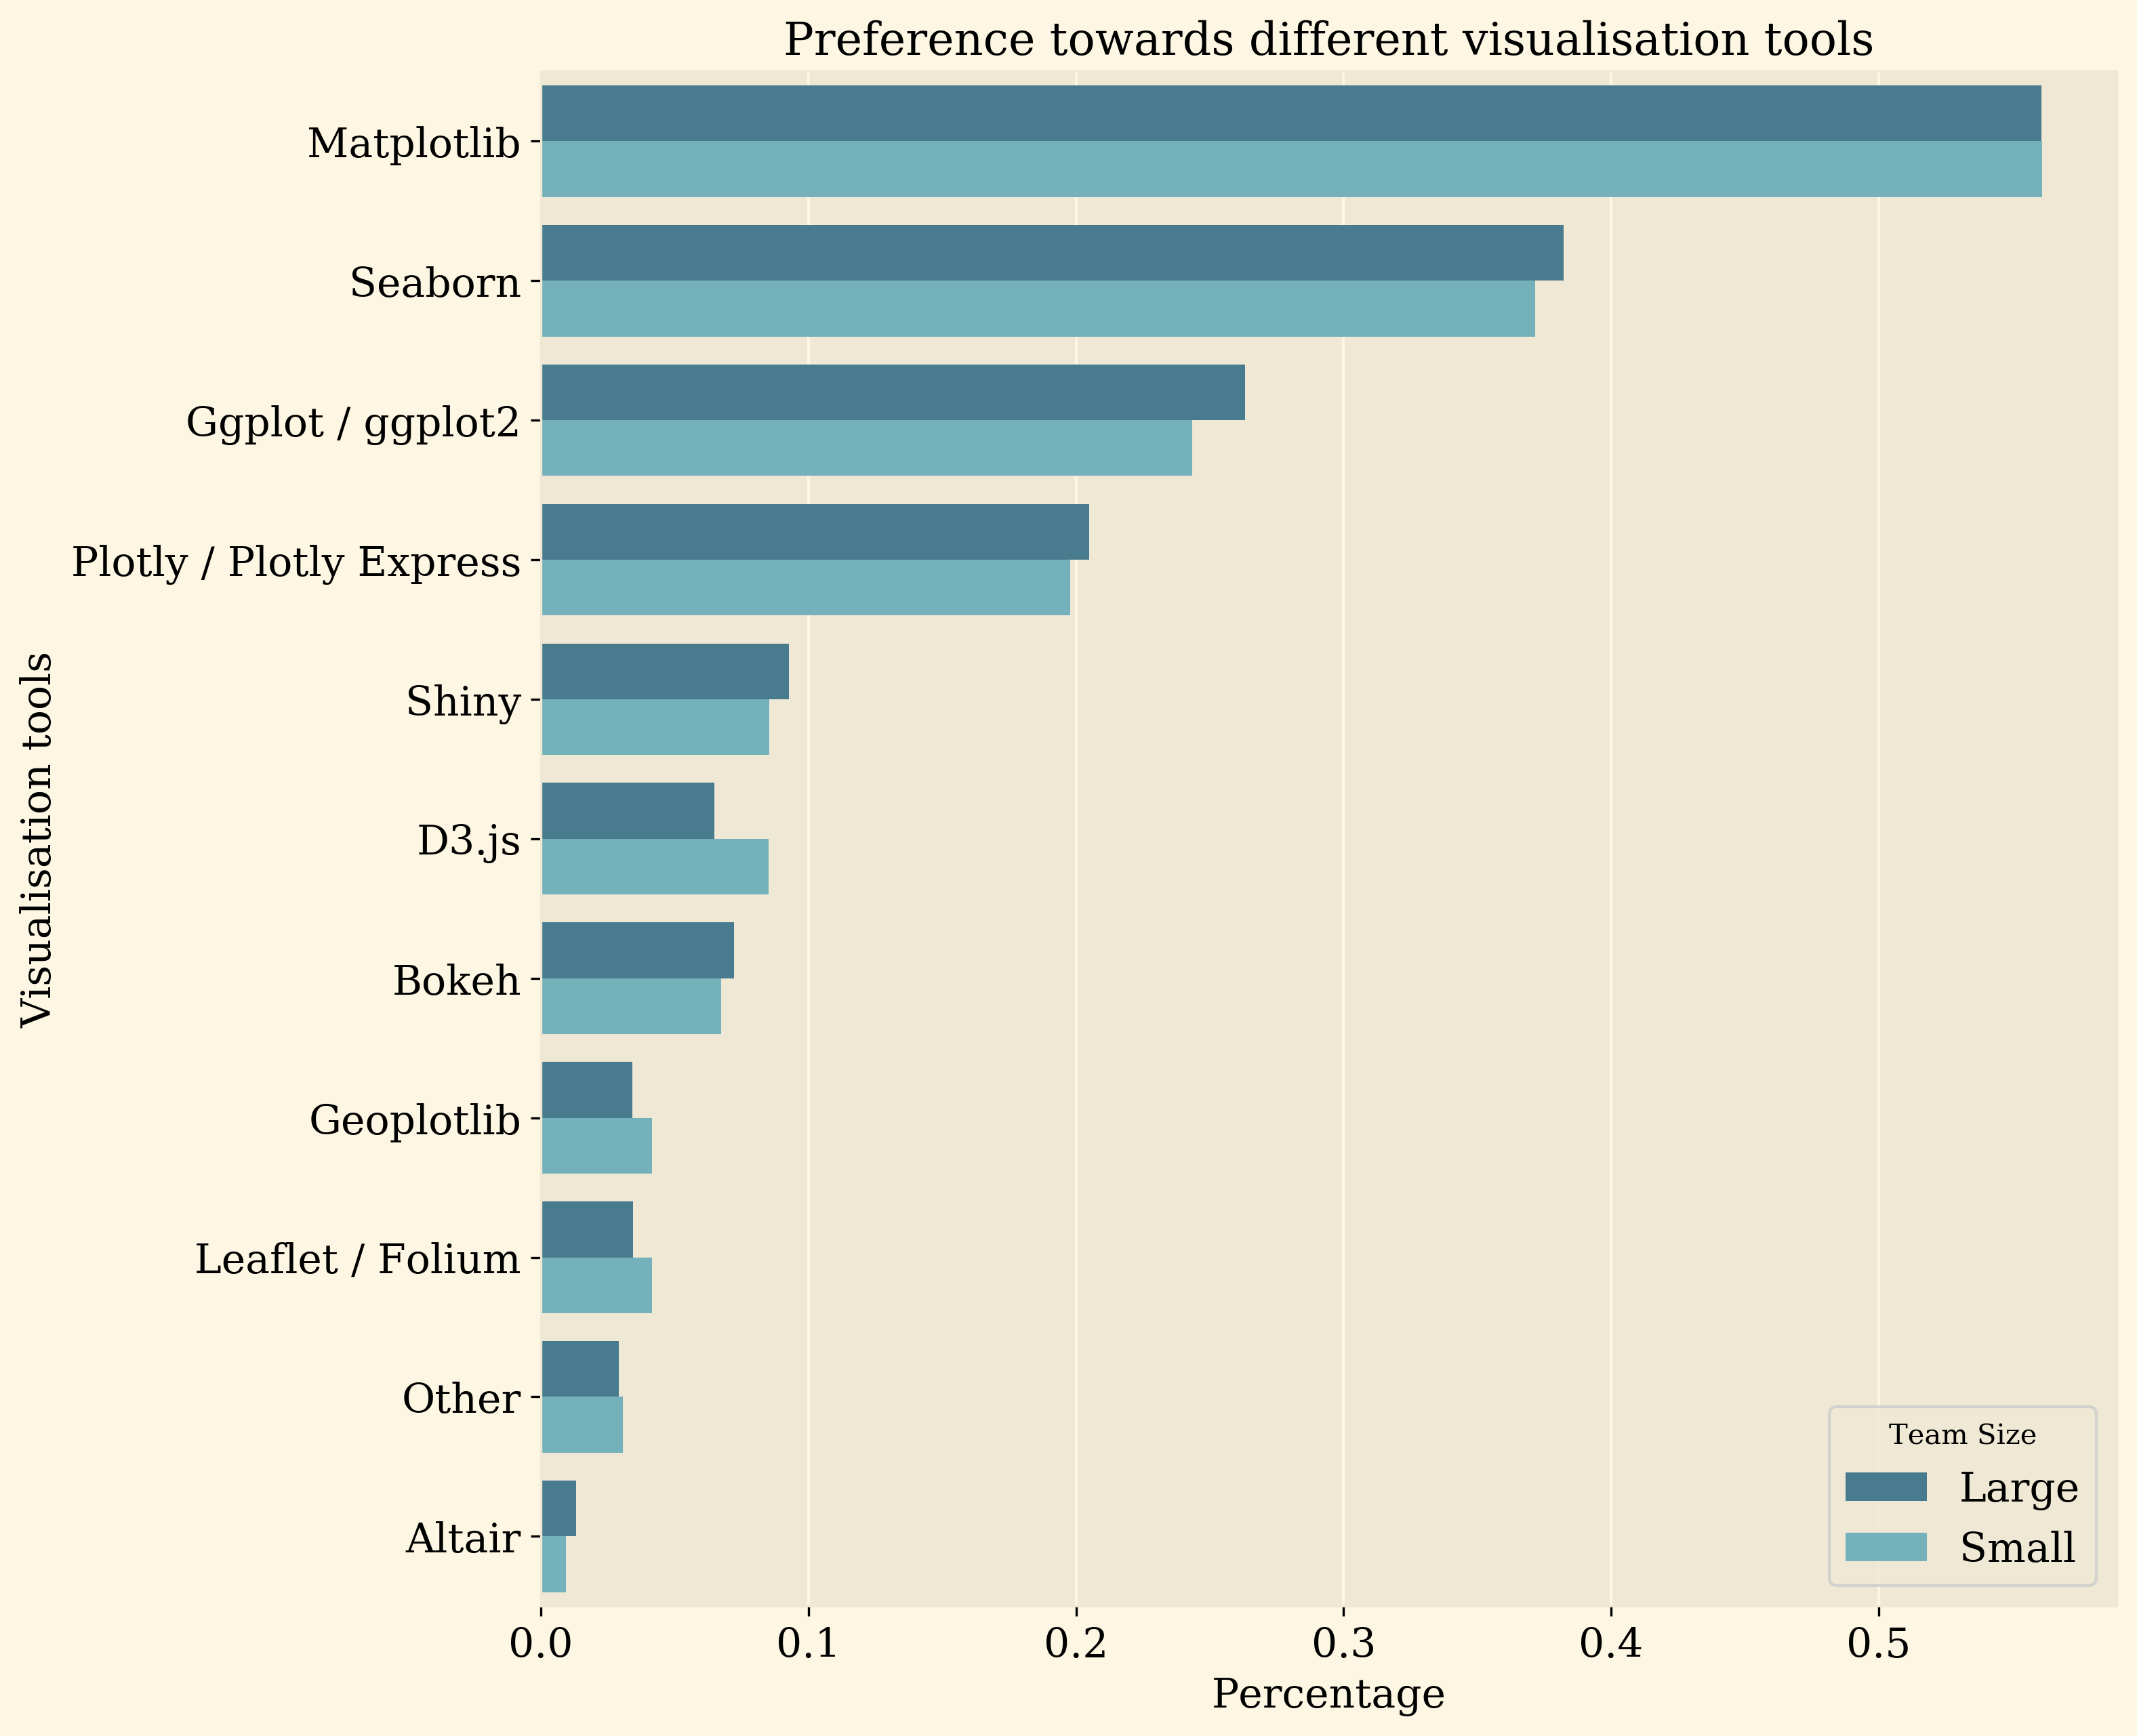

In [40]:
#generated with seaborn's barplot method
#sns.set(rc={'figure.figsize':(16,8)})
rcParams['figure.figsize'] = 10, 10
#sns.set(style="whitegrid")
sns.barplot(data=df_melted_2, x='Percentage', y='Visualisation tools', hue='Team Size', palette="GnBu_d")\
                        .set_title('Preference towards different visualisation tools',size = 16); #note that hue attribute recognizes the categorical dimension

# Interactive Visualisations
The interactive visualisations for our presentantion have been based partially in python packages. For each visualisation we mention how every visualisation was produced

## 1. Radar Chat - Use of cloud products per different size of team 
### (Static & Interactive Visualisation in Plotly Express for Python)
> Note that this visualisation is the only one which appears in both the static and the interactive visualisation. In this way want to demonstrate what additional features an interactive visualisation can offer to a static one.

First we extract the attributes which contain the answer from multiple choice question (as per plot 5. from static visualisations)

In [83]:
#RADAR chart
polar = employed.loc[:,['Q7B',
'Q31_Part_1',
 'Q31_Part_2',
 'Q31_Part_3',
 'Q31_Part_4',
  'Q31_Part_5',
  'Q31_Part_6',
  'Q31_Part_7',
  'Q31_Part_8',
 'Q31_Part_9',
 'Q31_Part_10']] #select all potential answers for this question
            

for col in polar:
    print(polar[col].unique()) #get the actual answers

['Large' 'Small']
[nan 'Google BigQuery']
[nan 'AWS Redshift']
[nan 'Databricks']
[nan 'AWS Elastic MapReduce']
[nan 'Teradata']
[nan 'Microsoft Analysis Services']
[nan 'Google Cloud Dataflow']
[nan 'AWS Athena']
[nan 'AWS Kinesis']
[nan 'Google Cloud Pub/Sub']


Then we groupby these answers for large and small teams:

In [84]:
polar = polar.groupby('Q7B').count() #groupby pe
#ds_tool = ds_tool.set_index([pd.Index([0,1])]) #0 is 2-4, 1 is >4
polar.rename_axis('index', axis=1,inplace = True)
polar.columns= ['Google BigQuery', 'AWS Redshift', 'Databricks',
 'AWS Elastic MapReduce',  'Teradata', 'Microsoft Analysis Services', 
 'Google Cloud Dataflow', 'AWS Athena', 'AWS Kinesis', 'Google Cloud Pub/Sub' ]

polar.loc["Small"] = polar.loc["Small"] / 5324 #get the percentage rather than absolute number
polar.loc["Large"] = polar.loc["Large"] /6419
polar = polar.reset_index().melt(id_vars='Q7B')
polar.columns = ['Team Size', 'variable', 'value']
polar

,Team Size,variable,value
0,Large,Google BigQuery,0.078050
1,Small,Google BigQuery,0.077010
2,Large,AWS Redshift,0.052656
3,Small,AWS Redshift,0.040759
4,Large,Databricks,0.057953
5,Small,Databricks,0.041134
6,Large,AWS Elastic MapReduce,0.039726
7,Small,AWS Elastic MapReduce,0.030616
8,Large,Teradata,0.032871
9,Small,Teradata,0.018783


In [85]:
#plotly express 
fig = px.line_polar(polar, theta='variable', r='value', color='Team Size',line_close=True, #line_close actual connect the last category with the first one
            line_shape='spline', #smoothing lines

                   )

fig.update_layout(
    paper_bgcolor='#FDF4DC', #background colour
    polar_bgcolor='#D6C9B8', # inside circle background colour
    polar_angularaxis_color='black', # axis colour
    height=500,    #finalisinz sice and positioning
    width=600,      
    title= {
            'text': "Percentage of responders<br>who use different cloud products",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font':dict(family='Serif',
                               size=16,
                               color = 'black')
             }, 
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=75,
        pad=2)
)

fig.show()

Below we export the visualisation to javascript file

In [86]:
pio.write_html(fig, file='index.html', auto_open=True)

init_notebook_mode(connected=True)

embed_string = plot(fig, output_type='div', include_plotlyjs="cdn")

print(embed_string)

<div>
        
                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>    
            <div id="d69546df-c148-4a79-a57b-99540515a262" class="plotly-graph-div" style="height:500px; width:600px;"></div>
            <script type="text/javascript">
                
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    
                if (document.getElementById("d69546df-c148-4a79-a57b-99540515a262")) {
                    Plotly.newPlot(
                        'd69546df-c148-4a79-a57b-99540515a262',
                        [{"hovertemplate": "Team Size=Large<br>value=%{r}<br>variable=%{theta}<extra></extra>", "legendgroup": "Large", "line": {"color": "#636efa", "dash": "solid", "shape": "spline"}, "mode": "lines", "name": "Large", "r": [0.07804954042685777, 0.05265617697460664, 0.057952952173235706, 0.03972581398971802, 0.03287116373266864, 

## 2. Donut Chart - Male/Female allocation across Small and Large Teams 
### (Plotly for JavaScript)
Below we perform some initial pre-processing before we extract the data that we will use for creating a donut chart with plotly for JavaScript:

In [46]:
fmratio = employed.groupby(['Q2', 'Q7B'])['Q1'].count().to_frame()
fmratio = fmratio.iloc[0:4]
fmratio = fmratio.unstack(0)
fmratio.columns = ['Female', 'Male']
fmratio['Total'] = fmratio['Female'] + fmratio['Male']
fmratio['Female'] = round(fmratio['Female']/fmratio['Total'], 2)*100
fmratio['Male'] = round(fmratio['Male']/fmratio['Total'], 2)*100
fmratio

,Female,Male,Total
Q7B,,,
Large,16.0,84.0,6306
Small,14.0,86.0,5242


> These data have been used to create two donut charts which show the percent of responders for each group. The solution can be found in the individual file ./js/d3-barplot.js but also is presented in the complete presentantion (index.html).

## 3. Choropleth Map - Percentage of responders who work in large teams per country
### (Plotly Express for Python)
First we get the total responders per size of team and country

In [88]:
choro = employed.groupby(['Q3', 'Q7B'])['Q1'].count().to_frame()
choro

Q1
Q3             Q7B        
Algeria        Large    14
               Small    14
Argentina      Large    41
               Small    42
Australia      Large   100
...                    ...
United Kingdom Small   125
United States  Large  1376
               Small   766
Vietnam        Large    32
               Small    44

[116 rows x 1 columns]

Then we calculate the fraction of responders who work in small and large teams per country:

In [89]:
choro = choro.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
choro

,Q3,Q7B,Q1
0,Algeria,Large,50.000000
1,Algeria,Small,50.000000
2,Argentina,Large,49.397590
3,Argentina,Small,50.602410
4,Australia,Large,50.761421
...,...,...,...
111,United Kingdom,Small,37.537538
112,United States,Large,64.239029
113,United States,Small,35.760971
114,Vietnam,Large,42.105263


Below we do some preprocessing. In the plot we will actually use only the fraction of the large team only (as small and large sum to 100%):

In [ ]:
choro = choro.loc[choro.Q7B=='Large'] #some preprocessing
choro['Q1Large'] = choro['Q1'].round(2)
choro['Q1Small'] = 100-choro['Q1Large']
choro = choro.reset_index(drop=True)
choro.columns = ['Country', 'Team Size' , 'Percentage (%)' , 'Q1Large', 'Q1Small']
choro.head(2)  

In [48]:
#developed with plotly express and choropleth method
fig = px.choropleth(choro,  
                    locations="Country",  
                    color="Percentage (%)",  
                    locationmode = 'country names', 
                    color_continuous_scale="rdbu" #set a proper color scale #below 50 red colour , above blue
                   )



fig.update_layout(
    geo=dict(bgcolor= '#FDF4DC', lakecolor='#FDF4DC'),
   # title_text = 'Percent of responders in Large Data Teams',
  paper_bgcolor='#FDF4DC', #background colour
        height=600,    #finalisinz sice and positioning
    width=1000,  
        title= {
            'text': "Percentage of responders in large data teams",
            'y':0.95,
            'x':0.425,
        
            'xanchor': 'center',
            'yanchor': 'top',
            'font':dict(family='Serif',
                               size=20,
                               color = 'black'),
             }, 
        margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=10)
)


fig.show()

Below we export the visualisation to javascript file

In [90]:
pio.write_html(fig, file='index.html', auto_open=True)

init_notebook_mode(connected=True)

embed_string = plot(fig, output_type='div', include_plotlyjs="cdn")

print(embed_string)

<div>
        
                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>    
            <div id="88984c03-fd14-4577-827f-badbc6e19c5a" class="plotly-graph-div" style="height:500px; width:600px;"></div>
            <script type="text/javascript">
                
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    
                if (document.getElementById("88984c03-fd14-4577-827f-badbc6e19c5a")) {
                    Plotly.newPlot(
                        '88984c03-fd14-4577-827f-badbc6e19c5a',
                        [{"hovertemplate": "Team Size=Large<br>value=%{r}<br>variable=%{theta}<extra></extra>", "legendgroup": "Large", "line": {"color": "#636efa", "dash": "solid", "shape": "spline"}, "mode": "lines", "name": "Large", "r": [0.07804954042685777, 0.05265617697460664, 0.057952952173235706, 0.03972581398971802, 0.03287116373266864, 

## 3. Scatter Plot with multiple dimensions - Expenditure in Cloud Services x Median Salary per country 
### (Plotly Go in Python)
In this example we replicate the following solution that we have initialy developed in Plotly chart studio: https://plotly.com/~uceisko/2/

From our experience we realised that someone might be intrested to use Plotly chart studio as a sandbox (as it has an easy GUI) and then transfer their draft to plotly go (in Python) or to plotly javascript.

Below we start with some pre-processing steps to get the total number of responders per team size and country:

In [133]:
cont = employed.loc[employed.Q3!='Other'] #reply 'Other' is removed
cont = cont.groupby(['Q7B','Q3'])['Q1'].count().to_frame().reset_index()
cont

,Q7B,Q3,Q1
0,Large,Algeria,14
1,Large,Argentina,41
2,Large,Australia,100
3,Large,Austria,15
4,Large,Bangladesh,19
...,...,...,...
109,Small,Turkey,101
110,Small,Ukraine,72
111,Small,United Kingdom,125
112,Small,United States,766


Then we import the pycountry_convert (which was downloaded in the beginning of this notebook) to get the continent of every country:

In [134]:
#the following package has been downloaded from us. it returns the continents for different country names
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

continents = {
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
}

df_countries = employed['Q3'].to_frame()
df_countries = df_countries.loc[df_countries.Q3!='Other']
df_countries = df_countries.reset_index(drop=True)


countries = list(df_countries['Q3'])
cont_labels = [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]
cont_labels = pd.Series(cont_labels)
df_countries['Continent'] = cont_labels
df_countries = df_countries.drop_duplicates()
df_countries.head()

,Q3,Continent
0,India,Asia
1,Australia,Australia
2,France,Europe
4,United States,North America
5,Netherlands,Europe


This dataset is merged with our main one:

In [135]:
employed = employed.merge(df_countries, left_on='Q3', right_on='Q3', how='left')
employed.head(1) #check the last columns

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q7B,SalaryTemp,SalaryLowLimit,SalaryUpLimit,SalaryMean,CloudExp,CloudExpLowLimit,CloudExpUpLimit,CloudExpMean,Q4B,Continent_x,Continent_y,Continent_x,Continent_y,Continent_x,Continent_y,Continent_x,Continent_y,Continent
0,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Cloud-based data software & APIs (AWS, GCP, Az...",-1,-1,-1,-1,0,-1,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Now we get for every combination of team size, country and continent (reduntant as it has 1:1 connection with country), the median salary , the median cloud expenditure and the total number of responders

In [136]:
scatter = employed.groupby(['Q7B', 'Q3', 'Continent']).agg({'SalaryMean':'mean', 'CloudExpMean':'mean', 'Q1': 'count'}).reset_index()
scatter

,Q7B,Q3,Continent,SalaryMean,CloudExpMean,Q1
0,Large,Algeria,Africa,9442.307692,1892.857143,14
1,Large,Argentina,South America,19709.459459,6175.925926,41
2,Large,Australia,Australia,120237.113402,46149.107143,100
3,Large,Austria,Europe,52384.615385,5500.000000,15
4,Large,Bangladesh,Asia,7486.111111,425.000000,19
...,...,...,...,...,...,...
109,Small,Turkey,Asia,18623.626374,4212.765957,101
110,Small,Ukraine,Europe,25566.901408,1742.647059,72
111,Small,United Kingdom,Europe,69073.660714,13908.552632,125
112,Small,United States,North America,113294.138418,20772.345679,766


Below we create a new attribute. It will match and assign a hex colour to every continent.

In [137]:
scatter['ContinentColour'] = np.nan

In [138]:
scatter.loc[scatter.Continent=="Europe", 'ContinentColour'] = "#B78EF5"
scatter.loc[scatter.Continent=="Asia", 'ContinentColour'] = "#F5A89A"
scatter.loc[scatter.Continent=="Africa", 'ContinentColour'] = "#82BBF5"
scatter.loc[scatter.Continent=="South America", 'ContinentColour'] = "#F5F069"
scatter.loc[scatter.Continent=="North America",'ContinentColour'] = "#83F5C6"
scatter.loc[scatter.Continent=="Australia", 'ContinentColour'] = "#F59557"

In [139]:
scatter

,Q7B,Q3,Continent,SalaryMean,CloudExpMean,Q1,ContinentColour
0,Large,Algeria,Africa,9442.307692,1892.857143,14,#82BBF5
1,Large,Argentina,South America,19709.459459,6175.925926,41,#F5F069
2,Large,Australia,Australia,120237.113402,46149.107143,100,#F59557
3,Large,Austria,Europe,52384.615385,5500.000000,15,#B78EF5
4,Large,Bangladesh,Asia,7486.111111,425.000000,19,#F5A89A
...,...,...,...,...,...,...,...
109,Small,Turkey,Asia,18623.626374,4212.765957,101,#F5A89A
110,Small,Ukraine,Europe,25566.901408,1742.647059,72,#B78EF5
111,Small,United Kingdom,Europe,69073.660714,13908.552632,125,#B78EF5
112,Small,United States,North America,113294.138418,20772.345679,766,#83F5C6


Now we create two subsets: responders from large and small teams. They will be used seperately to create two identical (comparative) plots:

In [140]:
large = scatter.loc[scatter.Q7B=='Large']
small = scatter.loc[scatter.Q7B=='Small']

Now we will create the visualisation. As there are several elements, please consult the comments in the code.

In [143]:
#For create subplots we can only use plotly go (express does not offer currently such functionality)
#This leads to a more complicated syntax, but with much more abilities for our visualisation

from plotly.subplots import make_subplots  #to create subplots

fig = make_subplots(rows=1, cols=2,  subplot_titles=("Large Teams", "Small Teams")) #two subplots


fig.add_trace(  #first scatter plot with the large team
    go.Scatter( x=large.SalaryMean, y=large.CloudExpMean,
               mode='markers',
            marker=dict(
                size=large.Q1.to_list(), sizemode='area', color=large.ContinentColour  # 1. the size of each marker will be equivalent to the number of responders
                ),                                                                     # 2. The colour will match with the hex colour code that we assigned before for every continent
                text=large.Q3  #here we add label to each observation
              ),
    row=1, col=1
)

fig.add_trace(  #second scatter plot with the small team - the same as large teams
    go.Scatter( x=small.SalaryMean, y=small.CloudExpMean,
              mode='markers',
               marker=dict(size=small.Q1.to_list(), sizemode='area', color=small.ContinentColour),
             text=large.Q3 ),
    
    row=1, col=2
)

#large teams annotations
fig.add_annotation(
            x=140000,  #get the actual observation's values (in this case of US in large team)
            y=49500,
            xref='x1', #x1,y1 referes to first plot
            yref='y1',
            text="United States",
            ax=-100,  #ax,ay to the direction of the arrow
            ay=-20)

fig.add_annotation(  #the same for India
            x=24600,
            y=14900,
            xref='x1',
            yref='y1',
            text="India",
            ax=-10,
            ay=-50)

fig.add_annotation(  #the same for UK
            x=83300,
            y=38300,
            xref='x1',
            yref='y1',
            text="United Kingdon",
            ax=-75,
            ay=-20)

#small teams annotations  #and now for US,India,UK for small teams
fig.add_annotation(
            x=113200,  #get the actual observation's values
            y=20700,
            xref='x2',  #x2,y2 referes to second plot
            yref='y2',
            text="United States",
            ax=-100, #ax,ay to the direction of the arrow
            ay=-100)

fig.add_annotation(
            x=18600,
            y=5000,
            xref='x2',
            yref='y2',
            text="India",
            ax=-10,
            ay=-50)

fig.add_annotation(
            x=69000,
            y=13900,
            xref='x2',
            yref='y2',
            text="United Kingdon",
            ax=-70,
            ay=-70)

#Caption 
#We couldn't find alternative way to include caption, so we had to follow the same approach as the previous annotations. 
#In this case we disabled to show the arrow

fig.add_annotation(
            x=-0.05,
            y=-0.75,
    xref='paper', yref='paper', #assigned to the full plot
            text="This interactive visualisation depicts the median salary in USD &amp; the median expenditure on cloud services for different countries.<br>On the left side the responders work in large data teams were on the right side on small data teams. <br>The colour schemes refer to different continents.The size of each points refers to the number of responders.<br> Reference: <a href=\"https://www.kaggle.com/c/kaggle-survey-2019\">2019 Kaggle ML &amp; DS Survey</a><br> &nbsp;",
    align='left',        
    showarrow=False)


#axis labels with specific fonts, size, position
fig.update_yaxes(range=[0, 60000], col=1, title={  
                                                'text': "Expenditure on Cloud Services ($)", 
                                                'font':dict(family='Serif',size=16,color = 'black')
                                                }
                ),
fig.update_yaxes(range=[0, 60000], col=2, title={
                                                'text': "Expenditure on Cloud Services ($)", 
                                                'font':dict(family='Serif',size=16,color = 'black')
                                                }
                , side='right'), ##### note that for y2, we place it in the right
fig.update_xaxes(range=[0, 150000], col=1, title={
                                                'text': "Median Salary ($)", 
                                                'font':dict(family='Serif',size=16,color = 'black')
                                                }
                 ),
fig.update_xaxes(range=[0, 150000], col=2, title={
                                                'text': "Median Salary ($)", 
                                                'font':dict(family='Serif',size=16,color = 'black')
                                                }
                 )


#final layout's settings
fig.update_layout(height=500, width=1000, 
                 title= {
                        'text': "How countries spend on large and small data teams?",
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top',
                     'font':dict(family='Serif', 
                               size=24,
                               color = 'black')
                         }, 
                paper_bgcolor='#FDF4DC',
                plot_bgcolor='#FDF4DC',
                  showlegend=False,
                      margin=dict(
        l=100,
        r=100,
        b=170,
        t=100,
        pad=2)
                 )


for i in fig['layout']['annotations']:
    i['font'] = dict(family='Serif',
                               size=16,
                               color = 'black')  #adjust all annotations to have the same font
    
    

fig.show()

Below we export the visualisation to javascript file

In [144]:
pio.write_html(fig, file='index.html', auto_open=True)

init_notebook_mode(connected=True)

embed_string = plot(fig, output_type='div', include_plotlyjs="cdn")

print(embed_string)

<div>
        
                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>    
            <div id="60e2c016-699f-4ecb-ab33-a7eb418b30ac" class="plotly-graph-div" style="height:500px; width:1000px;"></div>
            <script type="text/javascript">
                
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    
                if (document.getElementById("60e2c016-699f-4ecb-ab33-a7eb418b30ac")) {
                    Plotly.newPlot(
                        '60e2c016-699f-4ecb-ab33-a7eb418b30ac',
                        [{"marker": {"color": ["#82BBF5", "#F5F069", "#F59557", "#B78EF5", "#F5A89A", "#B78EF5", "#B78EF5", "#F5F069", "#83F5C6", "#F5F069", "#F5A89A", "#F5F069", "#B78EF5", "#B78EF5", "#82BBF5", "#B78EF5", "#B78EF5", "#B78EF5", "#F5A89A", "#B78EF5", "#F5A89A", "#F5A89A", "#F5A89A", "#B78EF5", "#F5A89A", "#B78EF5", "#F5A89A", "#8

## 4. Barchart (D3.js)
The barchart which  wasused in the "Profile of responders" in the final presentantion actually indicates the number of responders for the different sizes. This information is the following:

In [145]:
employed.Q7B.value_counts()

Large    6419
Small    5324
Name: Q7B, dtype: int64

For the development of this file chart please consult the d3-barchart.js and the index.html file

## 5. Sankey Diagram - Years of Experience/Role/Size of Team distribution (D3.js - ready template)
Below we demonstrate how we pre-processed our dataset in order to use them in the Sankey Diagram ready template in D3.js. 
The visualisation is **not** included in the final presentantion. Instead you can find it in the directory ./sankey-diagram as we did not manage to include it in our main presentantantion (index.html) file.

First get the total number of responders for different years of experience, roles and data team size

In [159]:
sankey = employed.groupby(['Q23', 'Q5', 'Q7B'])['Q1'].count().to_frame().reset_index()
sankey

,Q23,Q5,Q7B,Q1
0,1-2 years,Business Analyst,Large,78
1,1-2 years,Business Analyst,Small,61
2,1-2 years,DBA/Database Engineer,Large,11
3,1-2 years,DBA/Database Engineer,Small,13
4,1-2 years,Data Analyst,Large,155
...,...,...,...,...
133,< 1 years,Product/Project Manager,Small,70
134,< 1 years,Software Engineer,Large,281
135,< 1 years,Software Engineer,Small,286
136,< 1 years,Statistician,Large,22


Below we pre-process this dataset in order to have it in the proper json format for the visualisation

In [167]:
sankey_level1 = employed.groupby(['Q23', 'Q5'])['Q1'].count().to_frame().reset_index()
sankey_level1.columns= ['source','target', 'value' ]
sankey_level1['value'] = sankey_level1['value'].astype(str)
sankey_level1.head()

,source,target,value
0,1-2 years,Business Analyst,139
1,1-2 years,DBA/Database Engineer,24
2,1-2 years,Data Analyst,321
3,1-2 years,Data Engineer,155
4,1-2 years,Data Scientist,754


With json package, we convert the above dataframe to json format.

In [168]:
import json
for i in sankey_level1.index:
    print(sankey_level1.loc[i].to_json()+",")

{"source":"1-2 years","target":"Business Analyst","value":"139"},
{"source":"1-2 years","target":"DBA\/Database Engineer","value":"24"},
{"source":"1-2 years","target":"Data Analyst","value":"321"},
{"source":"1-2 years","target":"Data Engineer","value":"155"},
{"source":"1-2 years","target":"Data Scientist","value":"754"},
{"source":"1-2 years","target":"Other","value":"417"},
{"source":"1-2 years","target":"Product\/Project Manager","value":"126"},
{"source":"1-2 years","target":"Software Engineer","value":"443"},
{"source":"1-2 years","target":"Statistician","value":"48"},
{"source":"10-15 years","target":"Business Analyst","value":"5"},
{"source":"10-15 years","target":"Data Analyst","value":"16"},
{"source":"10-15 years","target":"Data Engineer","value":"3"},
{"source":"10-15 years","target":"Data Scientist","value":"137"},
{"source":"10-15 years","target":"Other","value":"107"},
{"source":"10-15 years","target":"Product\/Project Manager","value":"7"},
{"source":"10-15 years","tar

In the same fashion, we follow the same procedure for the other levels:

In [169]:
sankey_level2 = employed.groupby(['Q5', 'Q7B'])['Q1'].count().to_frame().reset_index()
sankey_level2.columns= ['source','target', 'value' ]
sankey_level2['value'] = sankey_level2['value'].astype(str)

In [170]:
for i in sankey_level2.index:
    print(sankey_level2.loc[i].to_json()+",")

{"source":"Business Analyst","target":"Large","value":"339"},
{"source":"Business Analyst","target":"Small","value":"296"},
{"source":"DBA\/Database Engineer","target":"Large","value":"62"},
{"source":"DBA\/Database Engineer","target":"Small","value":"57"},
{"source":"Data Analyst","target":"Large","value":"702"},
{"source":"Data Analyst","target":"Small","value":"687"},
{"source":"Data Engineer","target":"Large","value":"332"},
{"source":"Data Engineer","target":"Small","value":"232"},
{"source":"Data Scientist","target":"Large","value":"2126"},
{"source":"Data Scientist","target":"Small","value":"1640"},
{"source":"Other","target":"Large","value":"1365"},
{"source":"Other","target":"Small","value":"1058"},
{"source":"Product\/Project Manager","target":"Large","value":"329"},
{"source":"Product\/Project Manager","target":"Small","value":"277"},
{"source":"Software Engineer","target":"Large","value":"1027"},
{"source":"Software Engineer","target":"Small","value":"963"},
{"source":"Stat

In [171]:
sankey_nodes = sankey_level1.iloc[:,0]
sankey_nodes = sankey_nodes.unique()
sankey_nodes_master = pd.DataFrame(sankey_nodes)
sankey_nodes_master

,0
0,1-2 years
1,10-15 years
2,2-3 years
3,20+ years
4,3-4 years
5,4-5 years
6,5-10 years
7,< 1 years


In [172]:
sankey_nodes = sankey_level2.iloc[:,0]
sankey_nodes = sankey_nodes.unique()
sankey_nodes_master = sankey_nodes_master.append(pd.DataFrame(sankey_nodes))
sankey_nodes_master = sankey_nodes_master.append(['Large', 'Small'])
sankey_nodes_master.columns = ['name']
sankey_nodes_master= sankey_nodes_master.reset_index(drop=True)
sankey_nodes_master

,name
0,1-2 years
1,10-15 years
2,2-3 years
3,20+ years
4,3-4 years
5,4-5 years
6,5-10 years
7,< 1 years
8,Business Analyst
9,DBA/Database Engineer


In [173]:
for i in sankey_nodes_master.index:
    print(sankey_nodes_master.iloc[i].to_json()+",")

{"name":"1-2 years"},
{"name":"10-15 years"},
{"name":"2-3 years"},
{"name":"20+ years"},
{"name":"3-4 years"},
{"name":"4-5 years"},
{"name":"5-10 years"},
{"name":"< 1 years"},
{"name":"Business Analyst"},
{"name":"DBA\/Database Engineer"},
{"name":"Data Analyst"},
{"name":"Data Engineer"},
{"name":"Data Scientist"},
{"name":"Other"},
{"name":"Product\/Project Manager"},
{"name":"Software Engineer"},
{"name":"Statistician"},
{"name":"Large"},
{"name":"Small"},


Finally all the print-outs were included in the kaggle_data.json file